# Capstone Project — The Battle of Neighbourhoods_Bengaluru


# Introduction

Bengaluru  is the Silicon city of India. It is a part of the city of Karnataka 4 districts. The city itself has a population of 84.3 lakhs. 

The center of Indias high-tech industry, the city is also known for its parks and nightlife. 

By Cubbon Park, Vidhana Soudha is a Neo-Dravidian legislative building. Former royal residences include 19th-century Bangalore Palace, modeled after England’s Windsor Castle, and Tipu Sultan’s Summer Palace, an 18th-century teak

Bangalore is nicknamed the "Garden City" for its gardens and parks and was once called a Pensioner's Paradise. Located on the Deccan Plateau in the south-eastern part of Karnataka, Bangalore is India's third most populated city and the fifth most populated urban agglomeration.

The official language of Bengaluru and the one that is most widely spoken is Kannada. However, English is also spoken as a formal language within businesses and government agencies. Over last decades it is continuously grow because of the city’s important role in government and commercial business.

With it’s diverse culture , comes diverse food items. There are many restaurants in Banglore City, each belonging to different categories like Chinese , Italian , French etc. So as part of this project , we will list and visualise all major parts of New Delhi City .

# Questions that can be asked using the above mentioned datasets

1) What is best location in Bengaluru  City for Chinese Cuisine ?

2) Which areas have large number of North Indian  Resturant Market ?

3) Which all areas have less number of resturant ?

4) Which is the best place to stay if I prefer Chinese Cuisine ?

5) What places are have best restaurant in Bengaluru ?

# Data

 ## For this project we need the following data :

* New Delhi Resturants data that contains list Locality, Resturant name,Rating along with their latitude and longitude.


          * Data source : Zomato kaggel dataset


          * Description : This data set contains the required information. And we will use this data set to explore various locality of Bengaluru city.

* Nearby places in each locality of new delhi city

           * Data source : Fousquare API

            * Description : By using this api we will get all the venues in each neighborhood
        

 # Approach

* Collect the new delhi city data from Zomato kaggel dataset <br>
* Using FourSquare API we will find all venues for each neighborhood.<br>
* Filter out all venues that are nearby by locality.<br>
* Using aggregative rating for each resturant to find the best places.<br>
* Visualize the Ranking of neighborhoods using folium library python

In [2]:
import pandas as pd
import numpy as np
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans


! pip install geocoder
import geocoder

     |████████████████████████████████| 98 kB 9.4 MB/s  eta 0:00:01


In [3]:
get_ipython().system('pip install folium')

     |████████████████████████████████| 94 kB 5.6 MB/s  eta 0:00:01


In [4]:
import folium

In [5]:
! pip install geocoder
import geocoder

# Read the zomato resturant data from csv file

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/peddareddynaresh/Applied-capstone-project/main/zomato.csv',encoding='ISO-8859-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [7]:
df_india = df[df['Country Code'] == 1]
df_BLR = df_india[df_india['City'] == 'Bangalore']
df_BLR.reset_index(drop=True, inplace=True)
df_BLR.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,50943,Sultans of Spice,1,Bangalore,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...","BluPetal Hotel, Koramangala","BluPetal Hotel, Koramangala, Bangalore",77.615428,12.933284,"North Indian, Mughlai",...,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.1,Green,Very Good,2416
1,58268,The Fatty Bao - Asian Gastro Bar,1,Bangalore,"610, 3rd Floor, 12th Main, Off 80 Feet Road, I...",Indiranagar,"Indiranagar, Bangalore",77.645396,12.970221,Asian,...,Indian Rupees(Rs.),Yes,Yes,No,No,4,4.7,Dark Green,Excellent,2369
2,51705,Toit,1,Bangalore,"298, Namma Metro Pillar 62, 100 Feet Road, Ind...",Indiranagar,"Indiranagar, Bangalore",77.640709,12.979166,"Italian, American, Pizza",...,Indian Rupees(Rs.),No,No,No,No,4,4.8,Dark Green,Excellent,10934
3,18162866,Three Dots & A Dash,1,Bangalore,"840/1,100 Feet Road, Metro Pillar 56-57, Indir...",Indiranagar,"Indiranagar, Bangalore",77.640489,12.980410,"European, Continental",...,Indian Rupees(Rs.),Yes,No,No,No,3,3.9,Yellow,Good,1354
4,18407918,Bombay Brasserie,1,Bangalore,"2989/B, 12th Main Road, HAL 2nd Stage, Indiran...",Indiranagar,"Indiranagar, Bangalore",77.645748,12.970324,Modern Indian,...,Indian Rupees(Rs.),No,Yes,No,No,3,4.2,Green,Very Good,231


# Data cleaning

# remove the unwanted columns and rows from dataset

In [8]:
df_Res= df_BLR[df_BLR.Longitude !=0.000000][['Restaurant Name','Locality','Longitude','Latitude','Cuisines','Aggregate rating','Rating text','Votes']]

In [9]:
df_Res = df_Res[df_Res['Aggregate rating'] !=0.0]

In [10]:
df_Res.head()

,Restaurant Name,Locality,Longitude,Latitude,Cuisines,Aggregate rating,Rating text,Votes
0,Sultans of Spice,"BluPetal Hotel, Koramangala",77.615428,12.933284,"North Indian, Mughlai",4.1,Very Good,2416
1,The Fatty Bao - Asian Gastro Bar,Indiranagar,77.645396,12.970221,Asian,4.7,Excellent,2369
2,Toit,Indiranagar,77.640709,12.979166,"Italian, American, Pizza",4.8,Excellent,10934
3,Three Dots & A Dash,Indiranagar,77.640489,12.980410,"European, Continental",3.9,Good,1354
4,Bombay Brasserie,Indiranagar,77.645748,12.970324,Modern Indian,4.2,Very Good,231


In [11]:
df_Res.shape

(20, 8)

In [12]:
Banglore_Rest = folium.Map(location=[12.9, 77.6], zoom_start=12)

X = df_Res['Latitude']
Y = df_Res['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters=5, random_state=0).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
df_Res ['Cluster'] = clusters

for latitude, longitude, Locality, cluster in zip(df_Res['Latitude'], df_Res['Longitude'], df_Res['Locality'], df_Res['Cluster']):
    label = folium.Popup(Locality, parse_html=True)
    folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(Banglore_Rest)  

Banglore_Rest 


## What places are have best restaurant in Bengaluru?

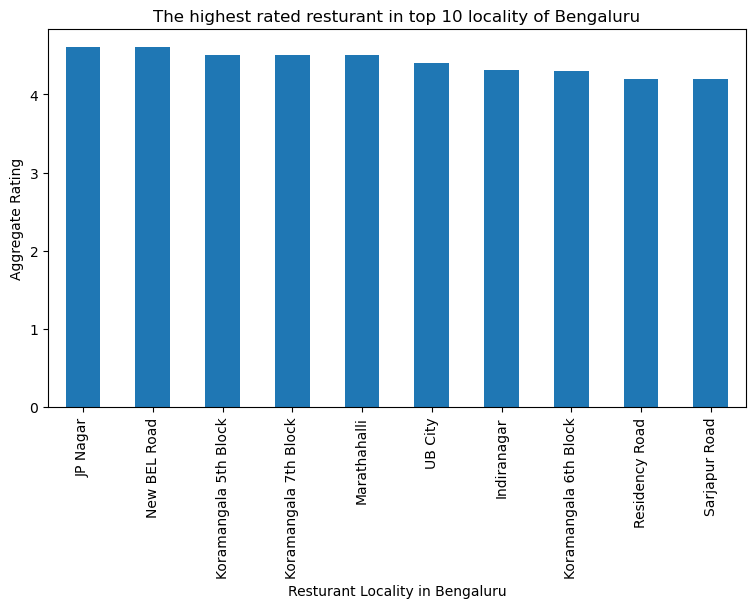

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest rated resturant in top 10 locality of Bengaluru')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bengaluru')
#On y-axis
plt.ylabel('Aggregate Rating')
#displays the plot
plt.show()

The Banglore has Best retsaurents in the JP Nagar and New BEL Road

# what places are have worst restaurants in Bengaluru?

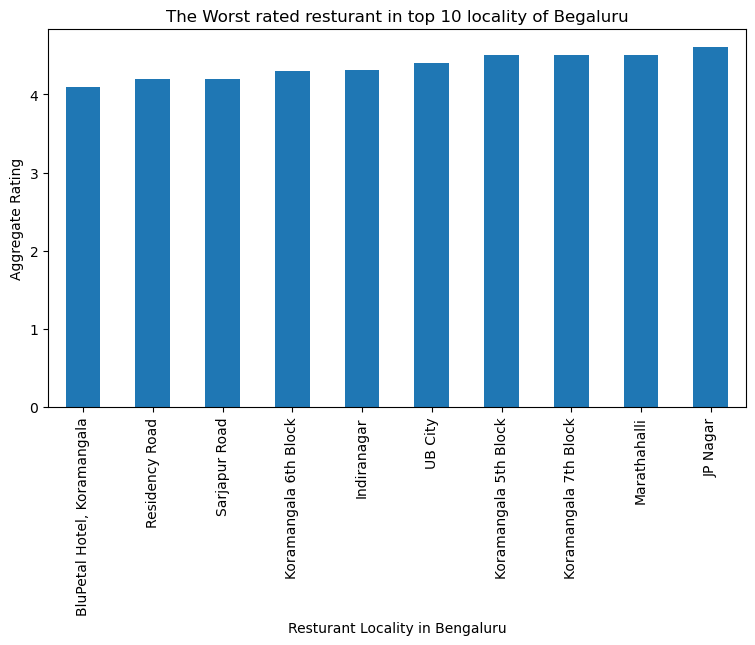

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The Worst rated resturant in top 10 locality of Begaluru')
#On x-axis

#giving a bar plot

df_Res.groupby('Locality')['Aggregate rating'].mean().nsmallest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bengaluru')
#On y-axis
plt.ylabel('Aggregate Rating')

#displays the plot
plt.show()

The Bengaluru has the worst restaurents in Koramangla,Residency Road.

# Which place are suitable for edible person in Bengaluru city?

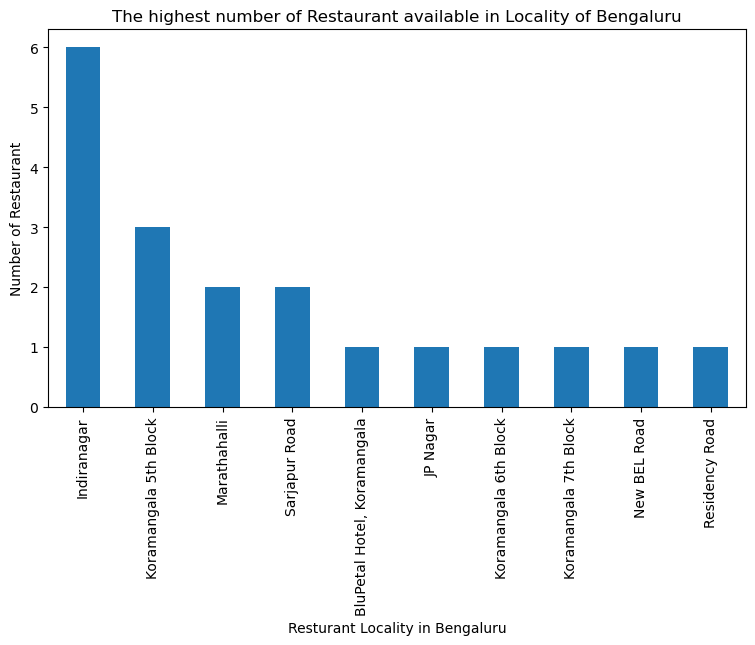

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The highest number of Restaurant available in Locality of Bengaluru')
#On x-axis

#giving a bar plot
df_Res.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')

plt.xlabel('Resturant Locality in Bengaluru')
#On y-axis
plt.ylabel('Number of Restaurant')

#displays the plot
plt.show()

Indiranagar has the best place for edible person to stay here

# What are the best places for North Indian restaurant in Bengaluru city ?

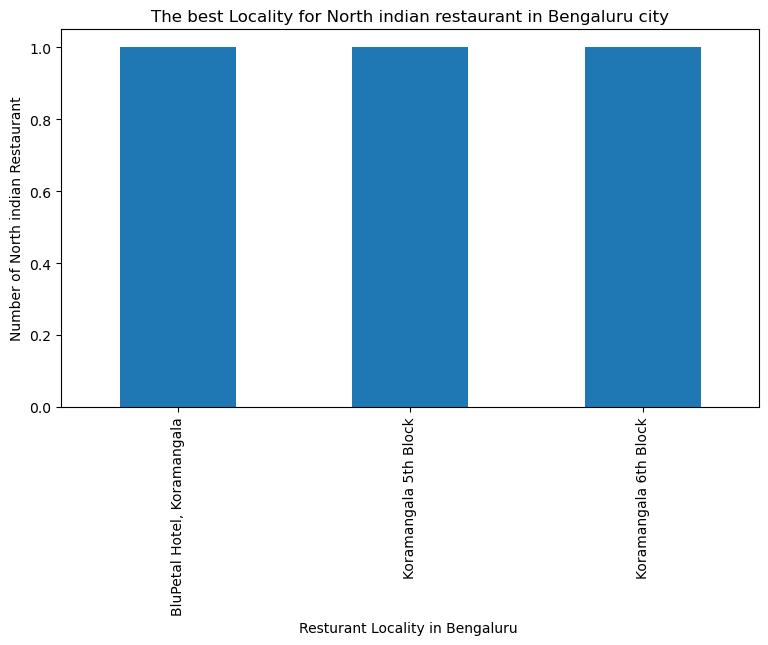

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('The best Locality for North indian restaurant in Bengaluru city')
#On x-axis

#giving a bar plot
df_Res[df_Res['Cuisines'].str.startswith('North')].groupby('Locality')['Restaurant Name'].count().nlargest(5).plot(kind='bar')

plt.xlabel('Resturant Locality in Bengaluru ')
#On y-axis
plt.ylabel('Number of North indian Restaurant')

#displays the plot
plt.show()

Kormangala has the almost all the North Indian restaurents

# Data transformation


Based on Locality grouping the data

In [26]:
df_Res_Loc =  df_Res.groupby('Locality').count()['Restaurant Name'].to_frame()
df_Res_Loc

,Restaurant Name
Locality,
"BluPetal Hotel, Koramangala",1
Indiranagar,6
JP Nagar,1
Koramangala 5th Block,3
Koramangala 6th Block,1
Koramangala 7th Block,1
Marathahalli,2
New BEL Road,1
Residency Road,1


In [28]:
df_Res_rating= df_Res.groupby('Locality')['Aggregate rating'].mean().to_frame()
df_Res_rating

,Aggregate rating
Locality,
"BluPetal Hotel, Koramangala",4.100000
Indiranagar,4.316667
JP Nagar,4.600000
Koramangala 5th Block,4.500000
Koramangala 6th Block,4.300000
Koramangala 7th Block,4.500000
Marathahalli,4.500000
New BEL Road,4.600000
Residency Road,4.200000


In [29]:
d_Cuisines = df_Res.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
d_Cuisines

,Locality,Cuisines
0,"BluPetal Hotel, Koramangala","North Indian, Mughlai"
1,Indiranagar,"Asian, Italian, American, Pizza, European, Con..."
2,JP Nagar,"Pizza, Cafe, Italian"
3,Koramangala 5th Block,"Continental, American, Italian, North Indian, ..."
4,Koramangala 6th Block,"North Indian, Chinese, Italian, Street Food, D..."
5,Koramangala 7th Block,"Continental, American"
6,Marathahalli,"European, Mediterranean, North Indian, Asian, ..."
7,New BEL Road,"Pizza, Cafe, Italian"
8,Residency Road,Continental
9,Sarjapur Road,"Finger Food, North Indian, Italian, Continenta..."


In [30]:
d_R = df_Res.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
d_R

,Locality,Rating text
0,"BluPetal Hotel, Koramangala",Very Good
1,Indiranagar,"Excellent, Good, Very Good"
2,JP Nagar,Excellent
3,Koramangala 5th Block,"Excellent, Very Good"
4,Koramangala 6th Block,Very Good
5,Koramangala 7th Block,Excellent
6,Marathahalli,"Excellent, Very Good"
7,New BEL Road,Excellent
8,Residency Road,Very Good
9,Sarjapur Road,"Excellent, Good"


In [31]:
d_V = df_Res.groupby(['Locality'])['Votes'].sum().to_frame()
d_V

,Votes
Locality,
"BluPetal Hotel, Koramangala",2416
Indiranagar,19834
JP Nagar,781
Koramangala 5th Block,15328
Koramangala 6th Block,753
Koramangala 7th Block,1288
Marathahalli,7890
New BEL Road,627
Residency Road,334


In [34]:
d_Lat = df_Res.groupby('Locality').mean()['Latitude'].to_frame()
d_Lat

,Latitude
Locality,
"BluPetal Hotel, Koramangala",12.933284
Indiranagar,12.976278
JP Nagar,12.906229
Koramangala 5th Block,12.933947
Koramangala 6th Block,12.939496
Koramangala 7th Block,12.935662
Marathahalli,12.962655
New BEL Road,13.029198
Residency Road,12.972532


In [35]:
d_Lng = df_Res.groupby('Locality').mean()['Longitude'].to_frame()
d_Lng

,Longitude
Locality,
"BluPetal Hotel, Koramangala",77.615428
Indiranagar,77.642775
JP Nagar,77.596791
Koramangala 5th Block,77.615415
Koramangala 6th Block,77.625999
Koramangala 7th Block,77.614130
Marathahalli,77.698025
New BEL Road,77.570997
Residency Road,77.608179


In [38]:
df_final = pd.merge(d_Lat,d_Lng,on='Locality').merge(df_Res_Loc, on='Locality').merge(d_Cuisines, on='Locality').merge(df_Res_rating,on ='Locality').merge(d_R, on ='Locality').merge(d_V, on ='Locality')
df_final

,Locality,Latitude,Longitude,Restaurant Name,Cuisines,Aggregate rating,Rating text,Votes
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753
5,Koramangala 7th Block,12.935662,77.614130,1,"Continental, American",4.500000,Excellent,1288
6,Marathahalli,12.962655,77.698025,2,"European, Mediterranean, North Indian, Asian, ...",4.500000,"Excellent, Very Good",7890
7,New BEL Road,13.029198,77.570997,1,"Pizza, Cafe, Italian",4.600000,Excellent,627
8,Residency Road,12.972532,77.608179,1,Continental,4.200000,Very Good,334
9,Sarjapur Road,12.913652,77.680818,2,"Finger Food, North Indian, Italian, Continenta...",4.200000,"Excellent, Good",6110


In [39]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cusines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753


In [40]:
df_final.shape

(11, 8)

# Define Foursquare Credentials and Version

In [41]:
## Define Foursquare Credentials and Version
CLIENT_ID = 'V15VJH4C11YCNPTNRLFDCZUL2IEEGHLMKPVM0YMSXPN3S2SO' # Foursquare ID
CLIENT_SECRET = '0SAKTUAD3VRKCJPX3DDBMRSYHISYLC1NZ3FIPKUVGGGNGYPQ' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: V15VJH4C11YCNPTNRLFDCZUL2IEEGHLMKPVM0YMSXPN3S2SO
CLIENT_SECRET:0SAKTUAD3VRKCJPX3DDBMRSYHISYLC1NZ3FIPKUVGGGNGYPQ


# create a function to repeat the same process to all the Locality in Bengaluru

In [42]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

# find the venues in all Bengaluru Locality

In [50]:
# find the venues in all New Delhi Locality
BLR_venues = getNearbyVenues(names=df_final['Locality'],
                                   latitudes=df_final['Lat'],
                                   longitudes=df_final['Lng']
                                  )

BluPetal Hotel, Koramangala
Indiranagar
JP Nagar
Koramangala 5th Block
Koramangala 6th Block
Koramangala 7th Block
Marathahalli
New BEL Road
Residency Road
Sarjapur Road
UB City


In [51]:
BLR_venues.head()

,Locality,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,Truffles Ice & Spice,12.933443,77.614265,Burger Joint
1,"BluPetal Hotel, Koramangala",12.933284,77.615428,Gilly's Rest-O-Bar,12.932987,77.614755,Bar
2,"BluPetal Hotel, Koramangala",12.933284,77.615428,Stoner,12.932759,77.614132,Ice Cream Shop
3,"BluPetal Hotel, Koramangala",12.933284,77.615428,Khawa Karpo,12.934051,77.616640,Chinese Restaurant
4,"BluPetal Hotel, Koramangala",12.933284,77.615428,XOOX Brewmill,12.935507,77.614982,Brewery


In [52]:
BLR_venues.groupby('Locality').count()

,Locality Latitude,Locality Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Locality,,,,,,
"BluPetal Hotel, Koramangala",100,100,100,100,100,100
Indiranagar,59,59,59,59,59,59
JP Nagar,30,30,30,30,30,30
Koramangala 5th Block,100,100,100,100,100,100
Koramangala 6th Block,23,23,23,23,23,23
Koramangala 7th Block,85,85,85,85,85,85
Marathahalli,6,6,6,6,6,6
New BEL Road,34,34,34,34,34,34
Residency Road,100,100,100,100,100,100


In [54]:
print('There are {} uniques categories.'.format(len(BLR_venues['Venue Category'].unique())))

There are 109 uniques categories.


In [55]:
## Analyze Each Locality

# one hot encoding
BLR_onehot = pd.get_dummies(BLR_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
BLR_onehot['Locality'] = BLR_venues['Locality'] 

# move Locality column to the first column
column_list = BLR_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
BLR_onehot = BLR_onehot[column_list]

BLR_onehot.head()

,Locality,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,...,Supermarket,Tea Room,Tennis Stadium,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Track Stadium,Trail,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"BluPetal Hotel, Koramangala",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
BLR_grouped = BLR_onehot.groupby('Locality').mean().reset_index()
BLR_grouped

,Locality,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Bakery,Bar,...,Supermarket,Tea Room,Tennis Stadium,Thai Restaurant,Tibetan Restaurant,Toy / Game Store,Track Stadium,Trail,Udupi Restaurant,Vegetarian / Vegan Restaurant
0,"BluPetal Hotel, Koramangala",0.0000,0.00,0.00,0.000000,0.000000,0.000000,0.020000,0.020000,0.030000,...,0.0000,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Indiranagar,0.0000,0.00,0.00,0.016949,0.000000,0.000000,0.000000,0.033898,0.033898,...,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.016949,0.016949
2,JP Nagar,0.0000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.066667,0.066667,...,0.0000,0.000000,0.000000,0.00,0.000000,0.033333,0.000000,0.000000,0.000000,0.000000
3,Koramangala 5th Block,0.0000,0.00,0.00,0.000000,0.000000,0.000000,0.020000,0.010000,0.030000,...,0.0000,0.010000,0.000000,0.00,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
4,Koramangala 6th Block,0.0000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.043478,0.000000,0.00,0.000000,0.043478,0.000000,0.000000,0.000000,0.043478
5,Koramangala 7th Block,0.0000,0.00,0.00,0.000000,0.000000,0.000000,0.023529,0.035294,0.023529,...,0.0000,0.011765,0.000000,0.00,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000
6,Marathahalli,0.0000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,New BEL Road,0.0000,0.00,0.00,0.000000,0.000000,0.000000,0.029412,0.000000,0.029412,...,0.0000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.029412,0.000000,0.000000
8,Residency Road,0.0000,0.01,0.01,0.000000,0.000000,0.010000,0.000000,0.010000,0.060000,...,0.0000,0.000000,0.000000,0.01,0.010000,0.000000,0.000000,0.000000,0.000000,0.010000
9,Sarjapur Road,0.0625,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0625,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500


In [58]:
BLR_grouped.shape

(11, 110)

In [59]:
num_top_venues = 5

for hood in BLR_grouped['Locality']:
    print("----"+hood+"----")
    temp = BLR_grouped[BLR_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----BluPetal Hotel, Koramangala----
                  venue  freq
0     Indian Restaurant  0.17
1                  Café  0.06
2    Chinese Restaurant  0.05
3  Fast Food Restaurant  0.04
4            Restaurant  0.04


----Indiranagar----
               venue  freq
0               Café  0.15
1  Indian Restaurant  0.14
2                Pub  0.07
3             Lounge  0.05
4        Pizza Place  0.05


----JP Nagar----
            venue  freq
0            Café  0.07
1          Bakery  0.07
2             Bar  0.07
3     Coffee Shop  0.07
4  Clothing Store  0.07


----Koramangala 5th Block----
                venue  freq
0   Indian Restaurant  0.18
1  Chinese Restaurant  0.05
2                Café  0.05
3        Dessert Shop  0.04
4              Lounge  0.04


----Koramangala 6th Block----
                           venue  freq
0                    Pizza Place  0.09
1                 Clothing Store  0.09
2             Seafood Restaurant  0.09
3                           Café  0.09
4  Vegetar

In [60]:
## put that into a pandas dataframe
## First, write a function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [63]:

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = BLR_grouped['Locality']

for ind in np.arange(BLR_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(BLR_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

,Locality,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BluPetal Hotel, Koramangala",Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Lounge,Restaurant,Dessert Shop,Bookstore,Bar,Coffee Shop
1,Indiranagar,Café,Indian Restaurant,Pub,Lounge,Pizza Place,Dessert Shop,Bar,Boutique,Chinese Restaurant,Restaurant
2,JP Nagar,Clothing Store,Café,Bakery,Bar,Coffee Shop,Pizza Place,Snack Place,Bus Stop,Restaurant,Chinese Restaurant
3,Koramangala 5th Block,Indian Restaurant,Chinese Restaurant,Café,Lounge,Dessert Shop,Fast Food Restaurant,Restaurant,Bar,Bookstore,Snack Place
4,Koramangala 6th Block,Clothing Store,Pizza Place,Café,Seafood Restaurant,South Indian Restaurant,Gastropub,Gym / Fitness Center,Ice Cream Shop,Indian Restaurant,Italian Restaurant
5,Koramangala 7th Block,Indian Restaurant,Bookstore,Dessert Shop,Café,Chinese Restaurant,Restaurant,Lounge,Bakery,Multiplex,Asian Restaurant
6,Marathahalli,Indian Restaurant,Pizza Place,Clothing Store,Chinese Restaurant,Fast Food Restaurant,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop
7,New BEL Road,Ice Cream Shop,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Coffee Shop,Burger Joint,German Restaurant,Italian Restaurant,Mexican Restaurant
8,Residency Road,Café,Indian Restaurant,Pub,Bar,Coffee Shop,Lounge,Chinese Restaurant,Donut Shop,Bookstore,Pizza Place
9,Sarjapur Road,Brewery,Café,Vegetarian / Vegan Restaurant,Restaurant,Coffee Shop,Eastern European Restaurant,Ice Cream Shop,Indian Restaurant,Liquor Store,Lounge


In [64]:
## Cluster Locality
## Run k-means to cluster the Locality into 5 clusters.

# set number of clusters
kclusters = 5

BLR_clustering = BLR_grouped.drop('Locality', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(BLR_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 
kmeans.labels_.shape

(11,)

In [67]:
BLR_merged = df_final.head(240)
BLR_merged['Cluster Labels'] = kmeans.labels_

# merge New_Delhi_grouped with df_Chinese to add latitude/longitude for each Locality
BLR_merged = BLR_merged.join(Locality_venues_sorted.set_index('Locality'), on='Locality')

BLR_merged.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Locality,Lat,Lng,No_of_Restaurant,Cusines,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"BluPetal Hotel, Koramangala",12.933284,77.615428,1,"North Indian, Mughlai",4.100000,Very Good,2416,0,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Lounge,Restaurant,Dessert Shop,Bookstore,Bar,Coffee Shop
1,Indiranagar,12.976278,77.642775,6,"Asian, Italian, American, Pizza, European, Con...",4.316667,"Excellent, Good, Very Good",19834,0,Café,Indian Restaurant,Pub,Lounge,Pizza Place,Dessert Shop,Bar,Boutique,Chinese Restaurant,Restaurant
2,JP Nagar,12.906229,77.596791,1,"Pizza, Cafe, Italian",4.600000,Excellent,781,1,Clothing Store,Café,Bakery,Bar,Coffee Shop,Pizza Place,Snack Place,Bus Stop,Restaurant,Chinese Restaurant
3,Koramangala 5th Block,12.933947,77.615415,3,"Continental, American, Italian, North Indian, ...",4.500000,"Excellent, Very Good",15328,0,Indian Restaurant,Chinese Restaurant,Café,Lounge,Dessert Shop,Fast Food Restaurant,Restaurant,Bar,Bookstore,Snack Place
4,Koramangala 6th Block,12.939496,77.625999,1,"North Indian, Chinese, Italian, Street Food, D...",4.300000,Very Good,753,1,Clothing Store,Pizza Place,Café,Seafood Restaurant,South Indian Restaurant,Gastropub,Gym / Fitness Center,Ice Cream Shop,Indian Restaurant,Italian Restaurant


In [68]:
# create final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
#colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
#rainbow = [colors.rgb2hex(i) for i in colors_array]
colors = ['red', 'green', 'blue', 'yellow','orange']

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(BLR_merged['Lat'], BLR_merged['Lng'], BLR_merged['Locality'], BLR_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [69]:
## Cluster 1
BLR_merged.loc[BLR_merged['Cluster Labels'] == 0, BLR_merged.columns[[1] + list(range(5, BLR_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,12.933284,4.100000,Very Good,2416,0,Indian Restaurant,Café,Chinese Restaurant,Fast Food Restaurant,Lounge,Restaurant,Dessert Shop,Bookstore,Bar,Coffee Shop
1,12.976278,4.316667,"Excellent, Good, Very Good",19834,0,Café,Indian Restaurant,Pub,Lounge,Pizza Place,Dessert Shop,Bar,Boutique,Chinese Restaurant,Restaurant
3,12.933947,4.500000,"Excellent, Very Good",15328,0,Indian Restaurant,Chinese Restaurant,Café,Lounge,Dessert Shop,Fast Food Restaurant,Restaurant,Bar,Bookstore,Snack Place
5,12.935662,4.500000,Excellent,1288,0,Indian Restaurant,Bookstore,Dessert Shop,Café,Chinese Restaurant,Restaurant,Lounge,Bakery,Multiplex,Asian Restaurant
8,12.972532,4.200000,Very Good,334,0,Café,Indian Restaurant,Pub,Bar,Coffee Shop,Lounge,Chinese Restaurant,Donut Shop,Bookstore,Pizza Place


In [70]:
## Examine Clusters

## Cluster 2
BLR_merged.loc[BLR_merged['Cluster Labels'] == 1, BLR_merged.columns[[1] + list(range(5, BLR_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,12.906229,4.6,Excellent,781,1,Clothing Store,Café,Bakery,Bar,Coffee Shop,Pizza Place,Snack Place,Bus Stop,Restaurant,Chinese Restaurant
4,12.939496,4.3,Very Good,753,1,Clothing Store,Pizza Place,Café,Seafood Restaurant,South Indian Restaurant,Gastropub,Gym / Fitness Center,Ice Cream Shop,Indian Restaurant,Italian Restaurant
10,12.972161,4.4,Very Good,754,1,Italian Restaurant,Café,Hotel,Mexican Restaurant,Lounge,Electronics Store,Restaurant,Coffee Shop,Clothing Store,Dessert Shop


In [72]:
## Examine Clusters

## Cluster 3
BLR_merged.loc[BLR_merged['Cluster Labels'] == 2, BLR_merged.columns[[1] + list(range(5, BLR_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,12.962655,4.5,"Excellent, Very Good",7890,2,Indian Restaurant,Pizza Place,Clothing Store,Chinese Restaurant,Fast Food Restaurant,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop


In [73]:
## Examine Clusters

## Cluster 4
BLR_merged.loc[BLR_merged['Cluster Labels'] ==3 , BLR_merged.columns[[1] + list(range(5, BLR_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,12.913652,4.2,"Excellent, Good",6110,3,Brewery,Café,Vegetarian / Vegan Restaurant,Restaurant,Coffee Shop,Eastern European Restaurant,Ice Cream Shop,Indian Restaurant,Liquor Store,Lounge


In [74]:
## Examine Clusters

## Cluster 5
BLR_merged.loc[BLR_merged['Cluster Labels'] == 4, BLR_merged.columns[[1] + list(range(5, BLR_merged.shape[1]))]]

,Lat,Agg_Rating,Comments,No_of_Votes,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,13.029198,4.6,Excellent,627,4,Ice Cream Shop,Indian Restaurant,Fast Food Restaurant,Chinese Restaurant,Pizza Place,Coffee Shop,Burger Joint,German Restaurant,Italian Restaurant,Mexican Restaurant


# Conclusion

1) The Banglore has Best retsaurents in the JP Nagar and New BEL Road. <br>
2) The Bengaluru has the worst restaurents in Koramangla,Residency Road. <br>
3) Indiranagar has the best place for edible person to stay here. <br>
4) Kormangala has the almost all the North Indian restaurents. <br> 5) #### Cluster 1: It is most recommended for Indian Restaurants.<br> 6) #### Cluster 2: It is most recommended for Cafeteria. <br> 7) #### Cluster 3 and Cluster 5: It is most recommended for Fast food. <br> 8) #### Cluster 4: It is most recommended for the cafe and Vegan Restaurent.